<a href="https://colab.research.google.com/github/zackcmariano/Airbnb-Paris---DataScience/blob/main/An%C3%A1lise_Dados_Airbnb_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="90%" src="https://raw.githubusercontent.com/zackcmariano/Airbnb-Paris---DataScience/main/ThemeAirbnbParis.png">

by [ZackMariano](https://github.com/zackcmariano)

# Analisando Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Nessa análise exploratória iremos usar o arquivo
* *listings.csv* - Summary information and metrics for listings in Paris (good for visualisations).

Arquivo datado de 14 de Dezembro de 2020.

*Download:* [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

In [3]:
#Importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-12-14/visualisations/listings.csv")


## Análise dos Dados

Através do dicionário de variáveis podemos ter um melhor entendimento da estruturação dos dados e avaliar melhor todo conjunto de informações disponibilizado.



**Dicionário das variáveis**


* **id** - número de id gerado para identificar o imóvel
* **name** - nome da propriedade anunciada 
* **host_id** - número de id do proprietário (anfitrião) da propriedade
* **host_name** - nome do anfitrião
* **neighbourdhood_group** - esta coluna não contém nenhum valor válido
* **neighbourdhood** - nome do bairro
* **latitude** - coordenada da latitude da propriedade
* **longitude** - coordenada da longitude da propriedade
* **room_type** - informa o tipo de quarto oferecido
* **price** - preço para alugar o imóvel
* **minimum_nights** - quantidade mínima de noites para reservar
* **number_of_reviews** - número de reviews que a propriedade possui
* **last_review** - data do último review
* **reviews_per_month** - quantidade de reviews por mês
* **calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião
* **availablity_365** - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrando as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.04,1,364
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.19,1,2
2,4890,Quiet Historic & Cute +Free Cruise,6792,Ryan Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,69,5,23,2020-09-07,0.21,14,67
3,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,62,1,231,2020-11-05,1.65,1,90
4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,53,15,269,2020-08-15,2.28,3,348


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguimos para a identificação de quantidade de entradas que nosso conjunto de dados possui e veremos os tipos de cada coluna.
Este dataset baixado consta a versão "resumida" do Airbnb em Paris. 
Na mesma página que foi baixado o arquivo da nossa análise atual *`listing.csv`* . Existe um arquivo *csv* mais completo com **65917** entradas e **106** variáveis *`listings.csv.gz`*.



In [6]:
#Volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

#Verificação das 5 primerias entradas
display(df.dtypes)

Entradas:	 65917
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.237996
last_review                       0.237996
name                              0.000971
host_name                         0.000425
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, a plotagem do histograma é a melhor solução.

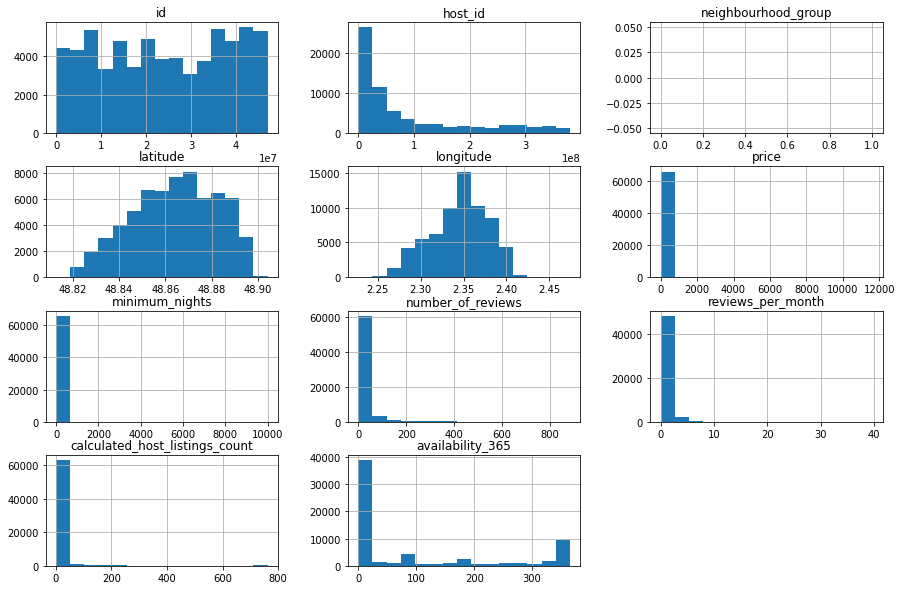

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**


Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.



In [10]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,65917.000000,65917.000000,65917.000000,50229.000000,65917.000000,65917.000000
mean,114.280201,5.656113,18.783394,0.689335,16.427098,96.354173
std,220.155923,44.279940,40.678117,0.983954,86.017717,137.362947
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,59.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,80.000000,2.000000,5.000000,0.360000,1.000000,0.000000
75%,120.000000,4.000000,18.000000,0.870000,2.000000,179.000000
max,11600.000000,9999.000000,882.000000,39.620000,762.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price`possui 75% do valor abaixo 632, porém seu valor máximo é 131727.
* A quantidade ménima de noites (`minimun_nights`) está acima de 365 dias no ano.

####Boxplot para minimun_nights


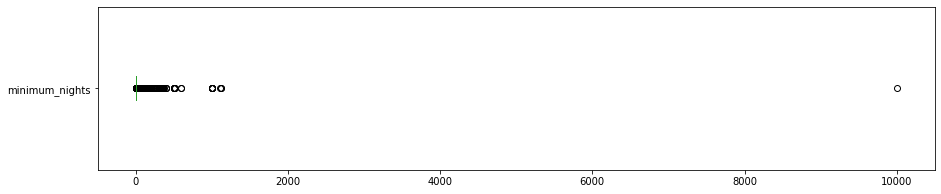

minimum_nights: valores acima de 30:
906 entradas
1.3745%


In [12]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

####Boxplot para price


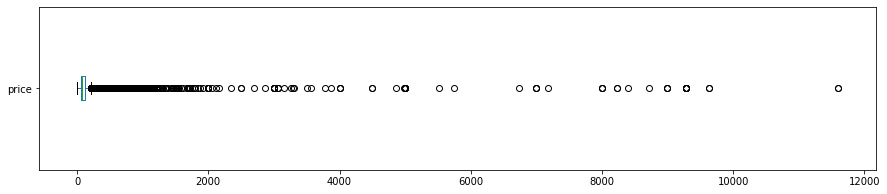


price: valores acima de 1500
90 entradas
0.1365%


In [13]:
#price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

#ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize(15,3));

####Histogramas sem outliers


Já que identificamos *outliers* nas variáveis `price` e `minimun_nights`, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

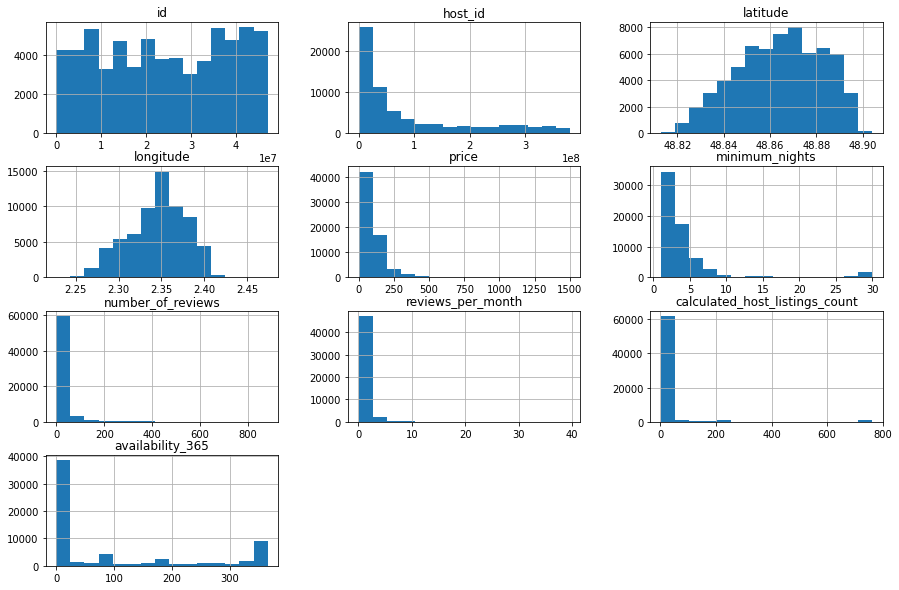

In [14]:
# remover os OUTLIERS em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover neighbourhood_group , pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

Vamos buscar relações existentes entre as variáveis, analisar os eventos e definir a intensidade de correlações existentes entres elas. o passo a passo será:
* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seabor`

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.017061,-0.005762,0.004722,0.069928,0.215985
minimum_nights,-0.017061,1.000000,-0.049535,-0.095397,0.022587,0.114654
number_of_reviews,-0.005762,-0.049535,1.000000,0.754764,-0.016893,0.197440
reviews_per_month,0.004722,-0.095397,0.754764,1.000000,0.019740,0.245562
calculated_host_listings_count,0.069928,0.022587,-0.016893,0.019740,1.000000,0.066145
availability_365,0.215985,0.114654,0.197440,0.245562,0.066145,1.000000


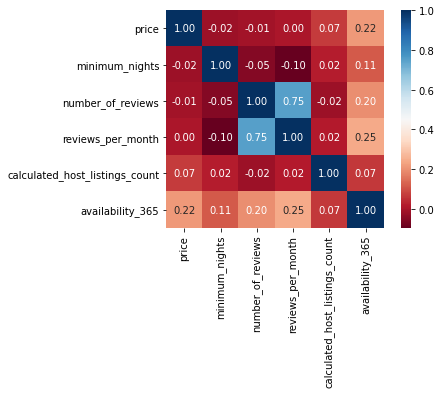

In [16]:
# plotando um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável *room_type* indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que exsitem opções de apartamentos / casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas. Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts`().

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    55658
Private room        7464
Hotel room          1390
Shared room          416
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.857226
Private room       0.114958
Hotel room         0.021408
Shared room        0.006407
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Paris?**



Uma maneira de se verificar uma variável em função da outra é usando `groupby`(). No caso, queremos comparar os bairros(*neighbourhoods*) a partir do preço de locação.

In [19]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Élysée            196.915825
Luxembourg        158.216383
Louvre            157.097282
Palais-Bourbon    156.578107
Bourse            146.178962
Passy             145.096521
Hôtel-de-Ville    139.548148
Temple            133.916407
Panthéon          119.892443
Opéra             115.584953
Name: price, dtype: float64

In [25]:
print(df_clean[df_clean.neighbourhood == "Élysée"].shape)

(1782, 15)


De acordo com a **análise** o bairro em Paris que possui o valor mais alto de locação é o **Élysée** com o total de **1782** imóveis disponíveis.

###Latitude e Longitude###

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se **x=**longitude e **y=**latitude.

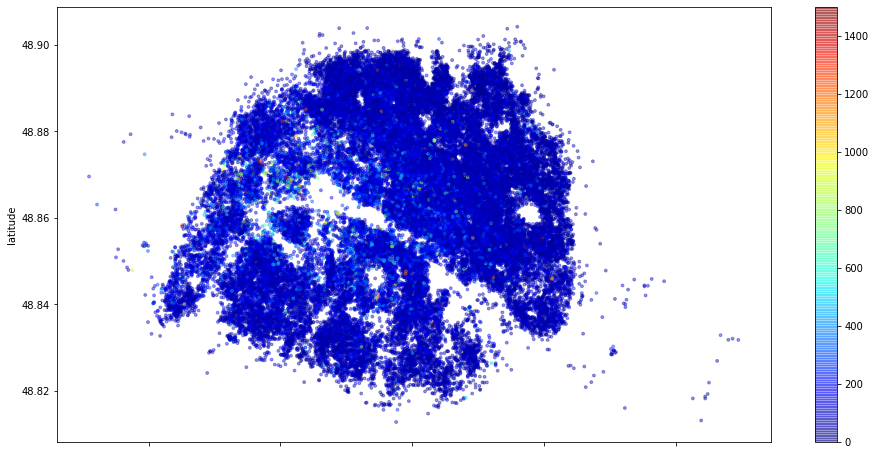

In [30]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(16,8));

## Conclusões ##

Fizemos uma análise baseada nos dados fornecidos pelo Airbnb, notamos ao longo do processo que existem *outliers* em algumas variáveis, aplicamos filtros para limpar as informações e leva-las com maior precisão.

Esse *dataset* é uma versão resumida dos dados que podem ser acessados pelo Airbnb, mas é o suficiente para uma abordagem inicial em um processo de Análise de Dados.
